In [1]:
import numpy as np
np.random.seed(13)
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
input_unit_size = 28*28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
def draw_digit(data, row, col, n):
    size = int(np.sqrt(data.shape[0]))
    plt.subplot(row, col, n)    
    plt.imshow(data.reshape(size, size))
    plt.gray()

In [7]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_train /= 255
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
x_train.shape

(60000, 784)

In [5]:
inputs = Input(shape=(input_unit_size,))
x = Dense(144, activation='relu')(inputs)
outputs = Dense(input_unit_size)(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adadelta')

In [6]:
model.fit(x_train, x_train, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 10s 39ms/step - loss: 1.2177
Epoch 2/10
235/235 [==============================] - 8s 34ms/step - loss: 1.2098
Epoch 3/10
235/235 [==============================] - 9s 37ms/step - loss: 1.2033
Epoch 4/10
235/235 [==============================] - 11s 46ms/step - loss: 1.1965
Epoch 5/10
235/235 [==============================] - 12s 51ms/step - loss: 1.1898
Epoch 6/10
235/235 [==============================] - 11s 45ms/step - loss: 1.1831
Epoch 7/10
235/235 [==============================] - 11s 47ms/step - loss: 1.1767
Epoch 8/10
235/235 [==============================] - 11s 45ms/step - loss: 1.1702
Epoch 9/10
235/235 [==============================] - 6s 26ms/step - loss: 1.1637
Epoch 10/10
235/235 [==============================] - 6s 27ms/step - loss: 1.1571


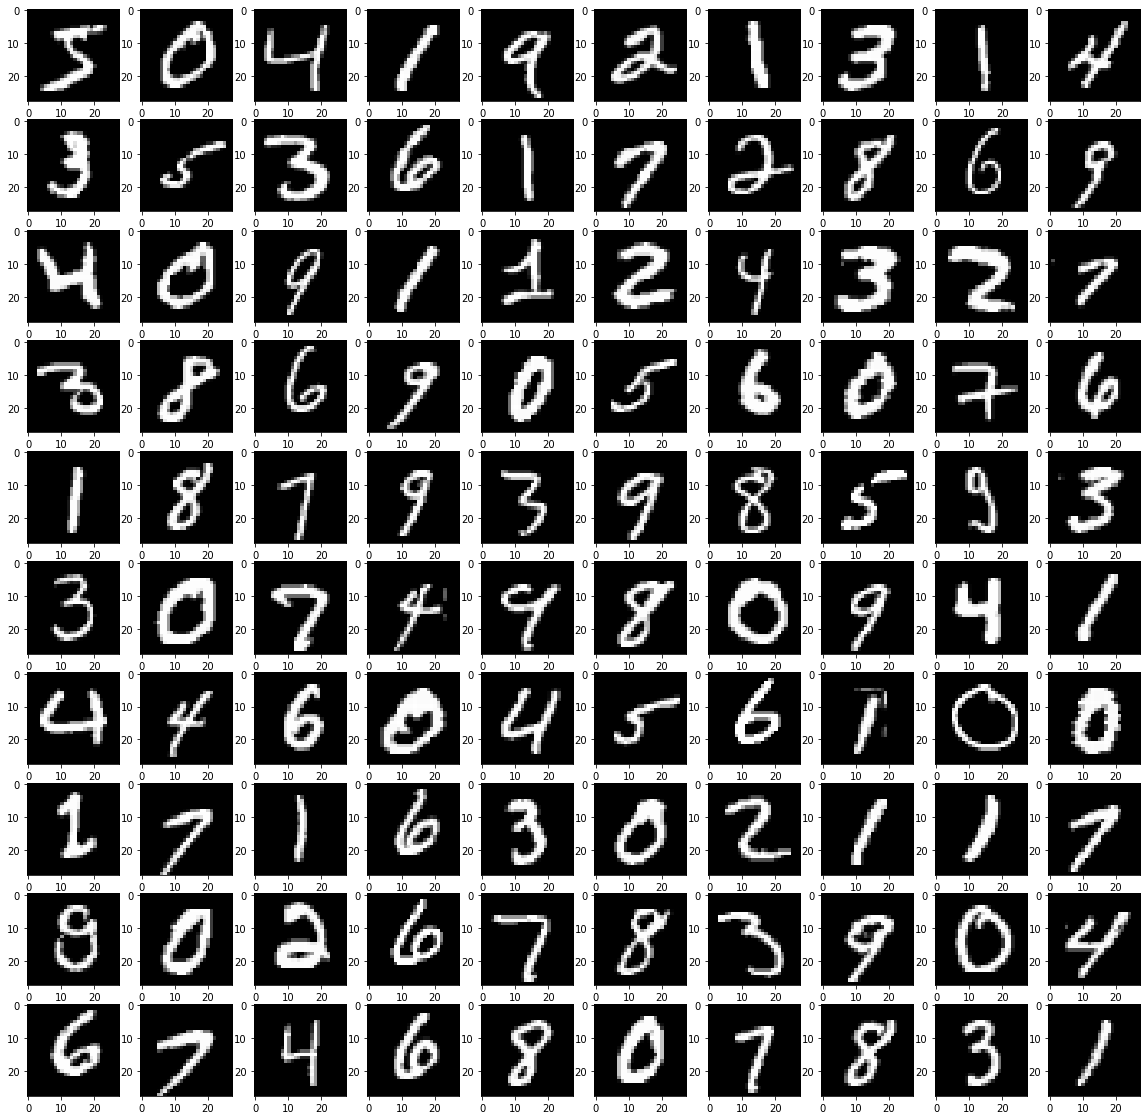

In [7]:
# raw image
show_size = 10
total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(x_train[total], show_size, show_size, total+1)
        total+=1
plt.show()

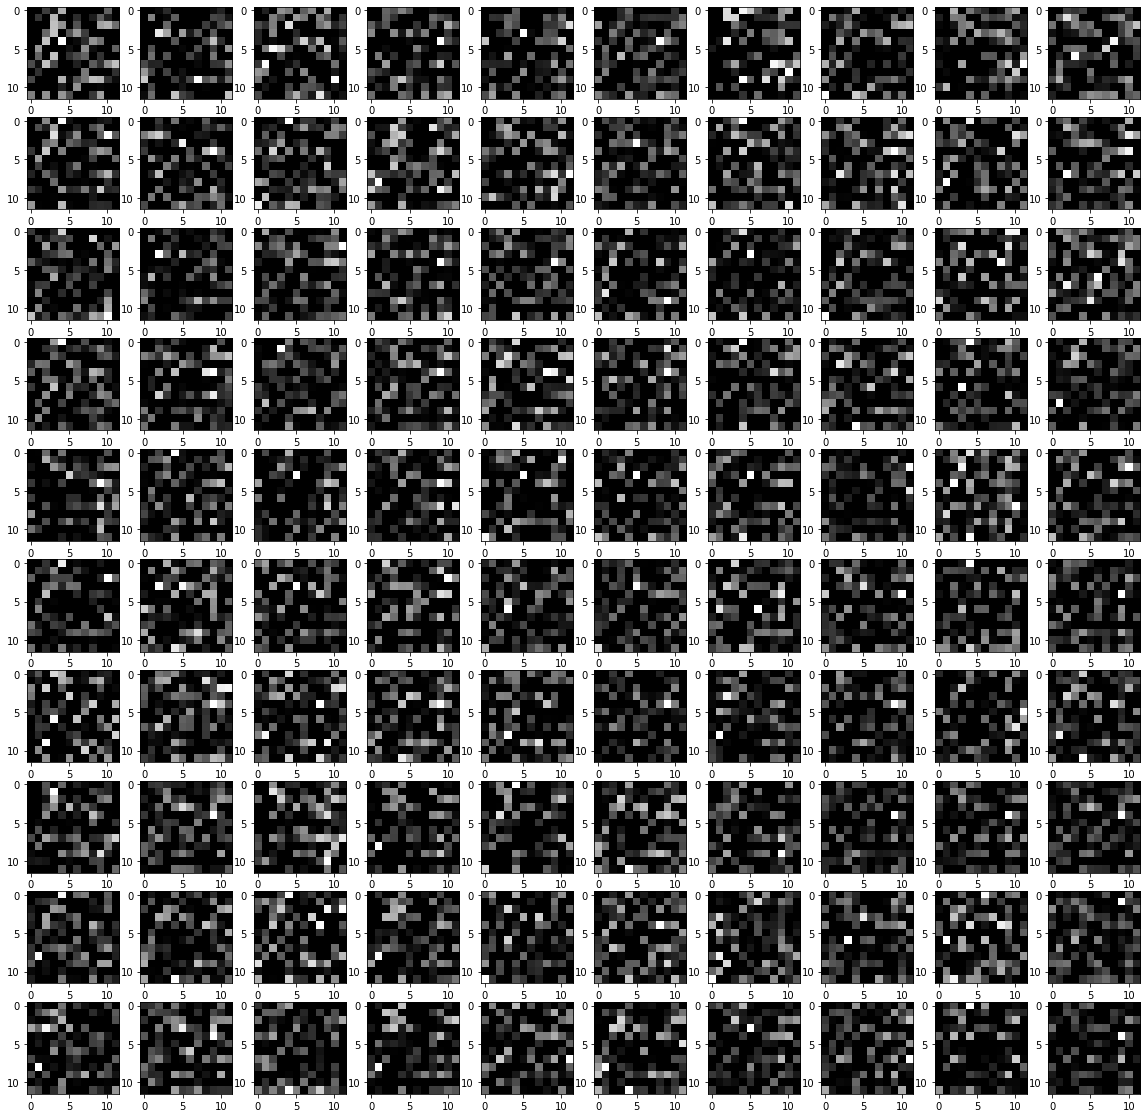

In [8]:
# hidden
get_layer_output = K.function([model.layers[0].input],
                              [model.layers[1].output])

hidden_outputs = get_layer_output([x_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(hidden_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

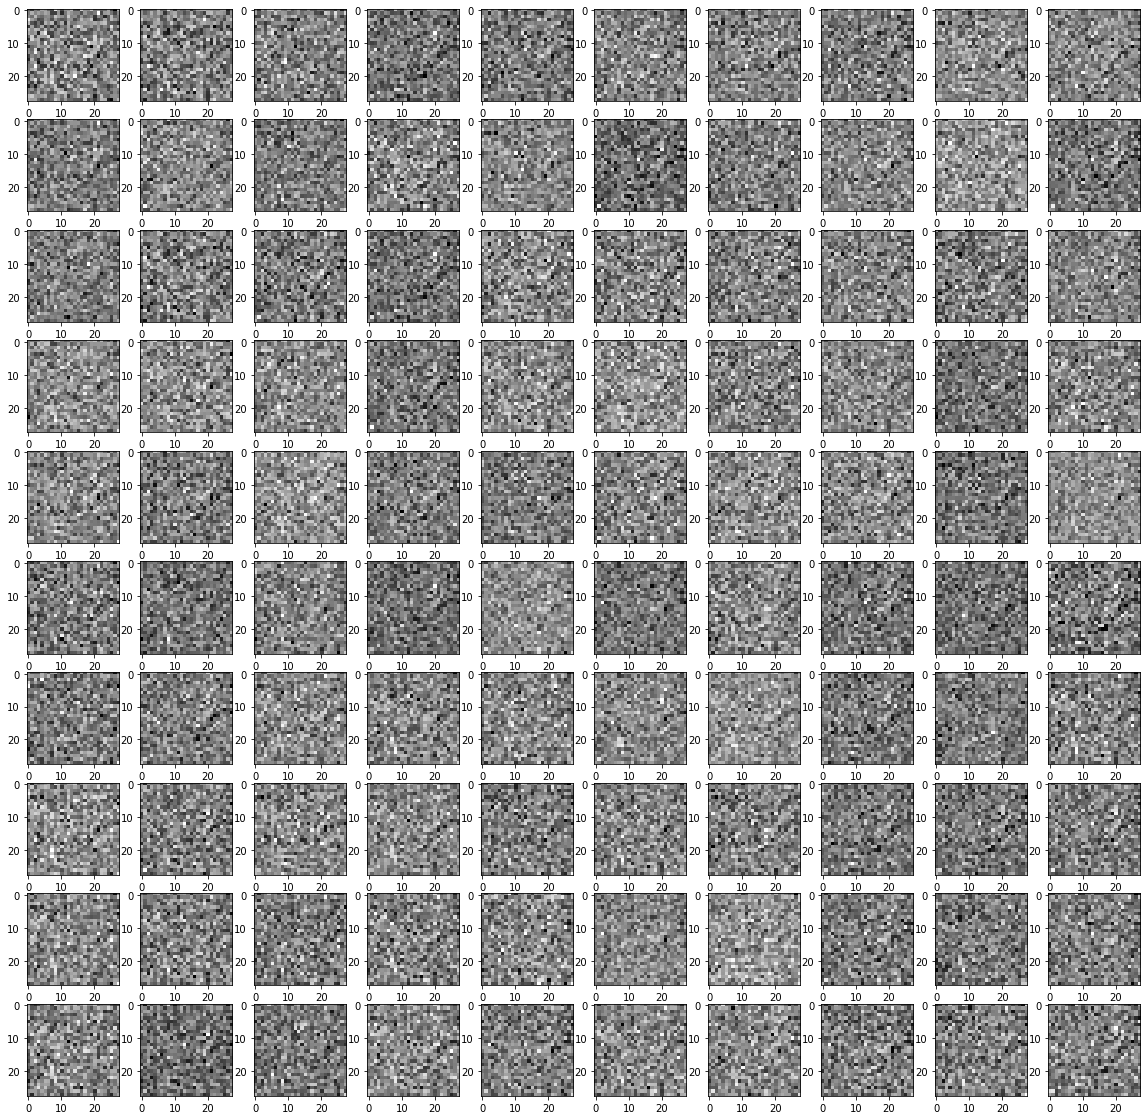

In [9]:
# reconstruct image
get_layer_output = K.function([model.layers[0].input],
                              [model.layers[2].output])

last_outputs = get_layer_output([x_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(last_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()